# Iris-Dataset modelled by k-Nearest-Neighbors with scikit-learn 
Training a K-nearest Neighbors data model with scikit-learn

Import and load of Iris dataset

In [6]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


## Daten-Preprocessing

Definition von Netz-input X und und Labels y and normalization of feature inputs X

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# standardize the features
# StandardScaler is a class that is used to standardize the dataset
sc = StandardScaler()
sc.fit(X_train) # estimate the sample mean and standard deviation for each feature dimension
# The transform method is then used to standardize the training data using those estimated parameters
X_train_std = sc.transform(X_train) # standardize the training data
X_test_std = sc.transform(X_test) # standardize the test data

## Model training

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_std, y_train)


KNeighborsClassifier(n_neighbors=3)

g:\Meine Ablage\Workspace\mlprojects\demos\iris_data_ml\decision_region_plotter.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


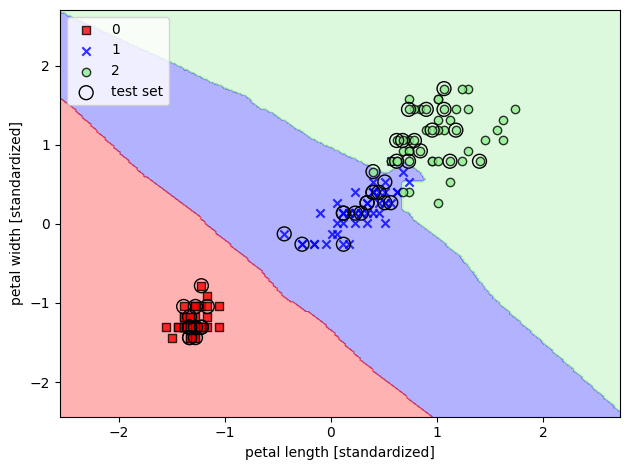

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 

from decision_region_plotter import plot_decision_regions

X_combined_std = np.vstack((X_train_std, X_test_std)) # stack arrays in sequence vertically (row wise)
y_combined = np.hstack((y_train, y_test)) # stack arrays in sequence horizontally (column wise)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn_model, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

## Accuracy

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn_model.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))    
print("Confusion-Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy: 0.978
Confusion-Matrix: 
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

